In [25]:
!python --version

Python 3.10.6


In [1]:
# ----------------------------------------------------------------------
# Importamos las librerías principales
# ----------------------------------------------------------------------

import numpy as np
import warnings

# Para graficar
import matplotlib.pyplot as plt
from seaborn import color_palette

# Para animar y visualizar animaciones
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# QP solvers
#!pip install qpsolvers
#from qpsolvers import solve_qp

# ----------------------------------------------------------------------
# CBF_tools
# ----------------------------------------------------------------------

# Toolbox
from CBF_tools.toolbox import *

# GVF trajectories
from CBF_tools.gvf_traj_ellipse  import *

# GVF + CBF simulator
from CBF_tools.simulator import simulator

# ----------------------------------------------------------------------
# Variables globales
# ----------------------------------------------------------------------
FOLDER_OUTPUT = "output"

# ----------------------------------------------------------------------
# Init
# ----------------------------------------------------------------------
createDir(FOLDER_OUTPUT)

¡El directorio 'output' ya existe!


# Simulaciones

## PLOT: Simulación GVF sencilla

In [2]:
# ----------------------------------------------------------------------
# Parámetros de la trayectoria
# ----------------------------------------------------------------------
XYoff = [0, 0]
a, b = 10, 7
alpha = 0

# Generamos la trayectoria
gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Parámetros del campo
s = 1
area = 30**2
XYoff_vfield = XYoff

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 25

# Constantes de los controladores
ke = 4
kn = 2

r = 10
gamma = 2

# Estado inicial de los agentes y número de agentes
n_agents = 2
p0 = np.array([[2, 2], [2, 8]])
v0 =  np.array([[0.8,0.9]]).T
phi0 = np.pi - np.array([-3*np.pi/4, -np.pi])

x0 = [t0, p0, v0, phi0]

In [3]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulator(gvf_traj, n_agents, x0, dt, True)
sim.set_params(s, ke, kn, r, gamma)

# Generamos el campo (sin interacción de repulsión)
gvf_traj.vector_field(XYoff_vfield, area, s, ke)

# Realizamos toda la simulación mumerica
xdata, ydata = [], []
phidata = []

while sim.t < t_sim_final:
  xdata.append(sim.pf[:,0])
  ydata.append(sim.pf[:,1])
  phidata.append(sim.phif)

  sim.int_euler()

# Pasamos todas las listas a numpy arrays para facilitar la indexación
xdata = np.array(xdata)
ydata = np.array(ydata)
phidata = np.array(phidata)

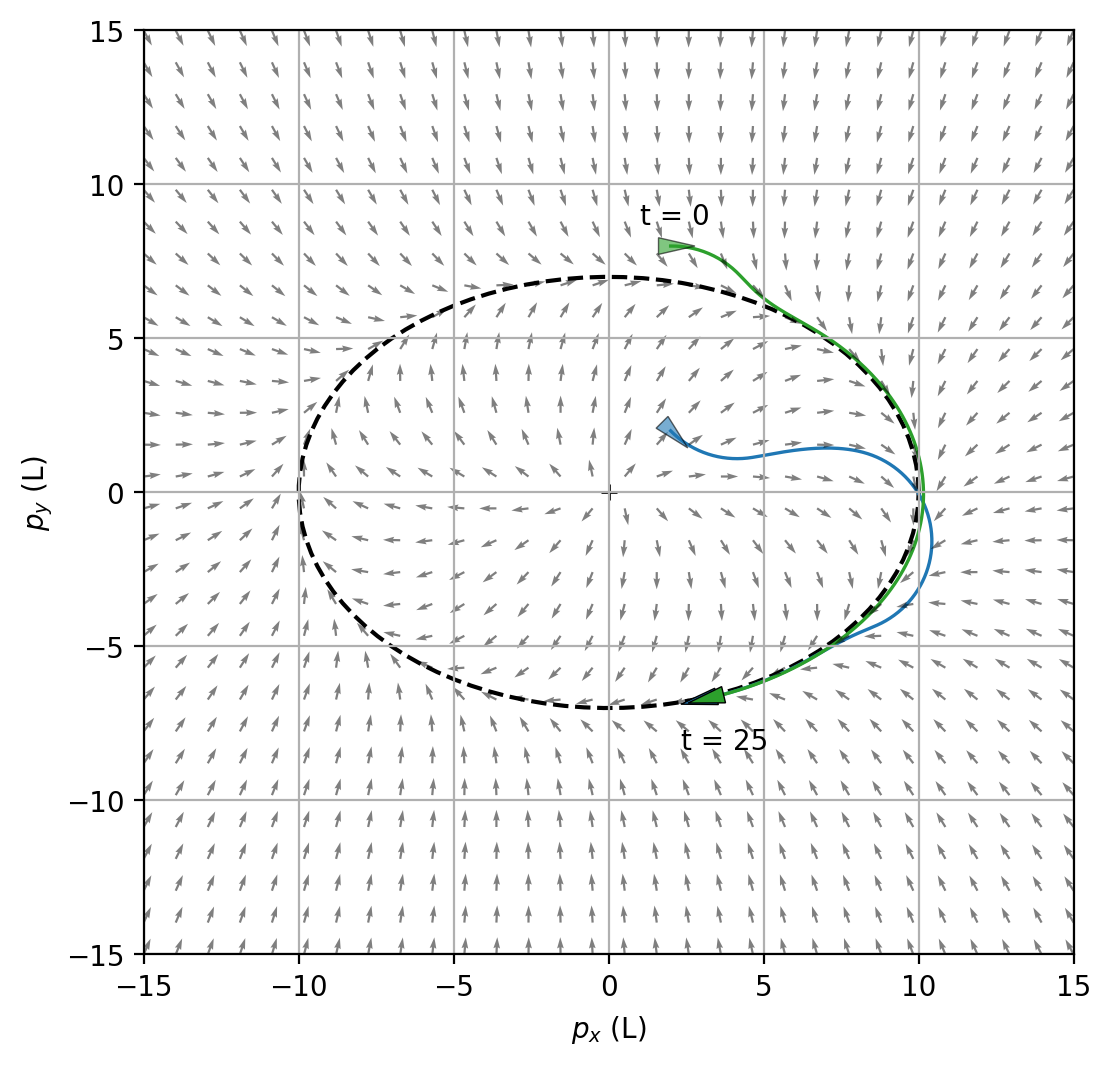

In [4]:
# Nos aseguramos de que la graficación interactiva está desactivada
%matplotlib inline

# ----------------------------------------------------------------------
# Mostramos el estado final de la simulación (static plot)
# ----------------------------------------------------------------------

fig = plt.figure(figsize=(6, 6), dpi=200)
grid = plt.GridSpec(1, 1)
main_ax = fig.add_subplot(grid[:,:])

# Axis configuration
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

# Main axis
draw(gvf_traj, fig, main_ax)


li = xdata.shape[0] - 1
for n in range(sim.N):
  color = color_palette()[n*2]
  icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], color)
  icon_init.set_alpha(0.6)
  icon = unicycle_patch([xdata[li,n], ydata[li,n]], phidata[li,n], color)
  icon.set_label("n"+str(n))

  main_ax.plot(xdata[:,n],ydata[:,n], c=color, ls="-", lw=1.2, zorder=0)
  main_ax.add_patch(icon_init)
  main_ax.add_patch(icon)

plt.text(xdata[0,1]-1, ydata[0,1]+0.7, "t = {0:.0f}".format(0))
plt.text(xdata[li,1]-1, ydata[li,1]-1.7, "t = {0:.0f}".format(t_sim_final))

plt.savefig(os.path.join(FOLDER_OUTPUT, 'GVF_CBF_intro1.png'))
plt.show()

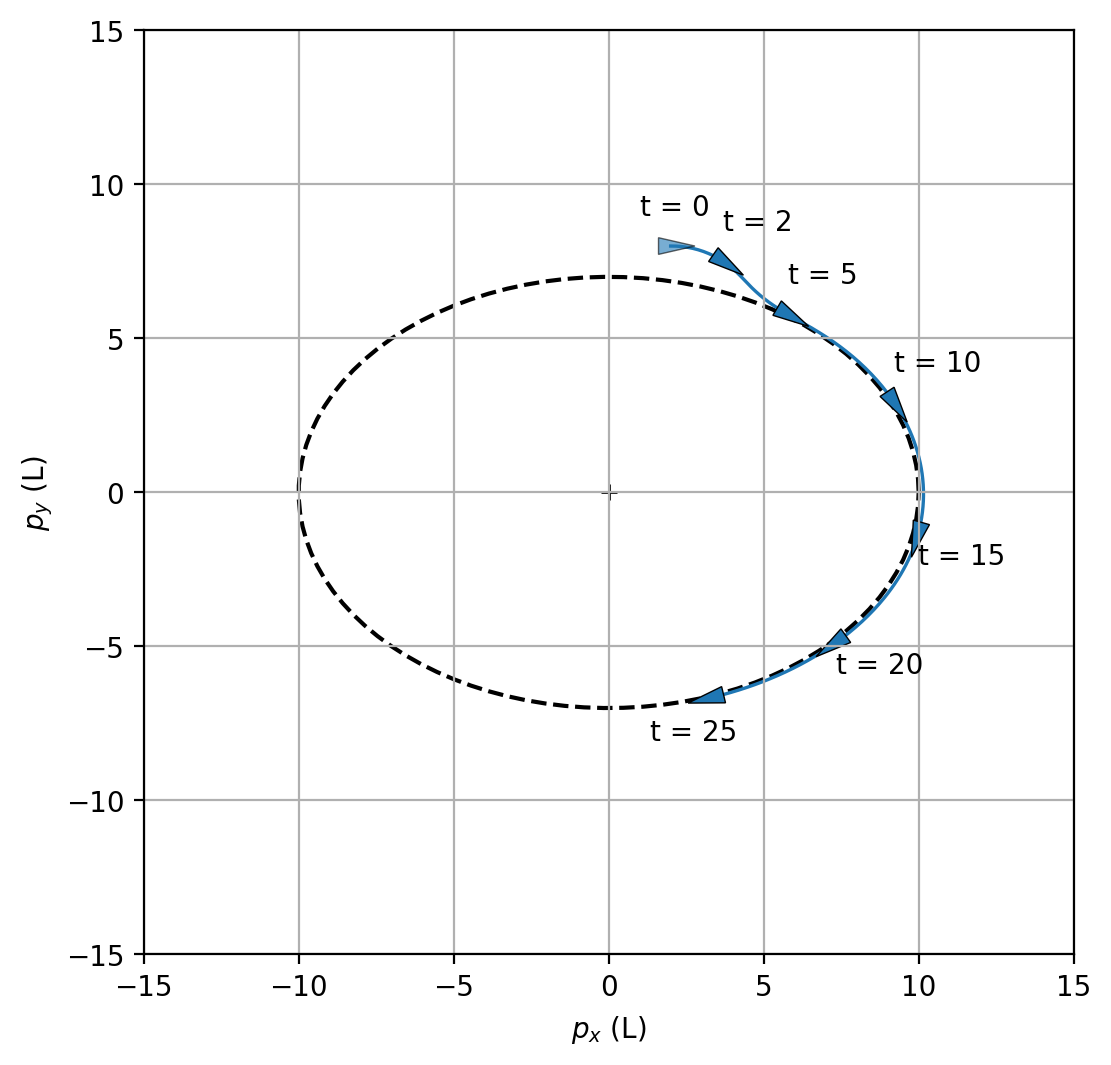

In [5]:
# ----------------------------------------------------------------------
# Mostramos el estado final de la simulación (static plot)
# ----------------------------------------------------------------------

fig = plt.figure(figsize=(6, 6), dpi=200)
grid = plt.GridSpec(1, 1)
main_ax = fig.add_subplot(grid[:,:])

# Axis configuration
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

# Main axis
draw(gvf_traj, fig, main_ax, draw_field=False)

li = xdata.shape[0] - 1
n = 1

color = color_palette()[0]
icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], color)
icon_init.set_alpha(0.6)
icon = unicycle_patch([xdata[li,n], ydata[li,n]], phidata[li,n], color)

main_ax.plot(xdata[:,n],ydata[:,n], c=color, ls="-", lw=1.2, zorder=0)
main_ax.add_patch(icon_init)
main_ax.add_patch(icon)

# Inicio y final
plt.text(xdata[0,n]-1, ydata[0,n]+1, "t = {0:.0f}".format(0))
plt.text(xdata[li,n]-2, ydata[li,n]-1.4, "t = {0:.0f}".format(t_sim_final))

# Waypoints
t_list = [2,5,10,15,20]

for t in t_list:
  li = int(t/dt)
  icon = unicycle_patch([xdata[li,n], ydata[li,n]], phidata[li,n], color)
  main_ax.add_patch(icon)
  if ydata[li,n] > 0:
    plt.text(xdata[li,n], ydata[li,n]+1, "t = {0:.0f}".format(t))
  else:
    plt.text(xdata[li,n], ydata[li,n]-1, "t = {0:.0f}".format(t))

plt.savefig(os.path.join(FOLDER_OUTPUT, 'GVF_CBF_intro2.png'))
plt.show()

## PLOT: Notación y gráficos ilustrativos

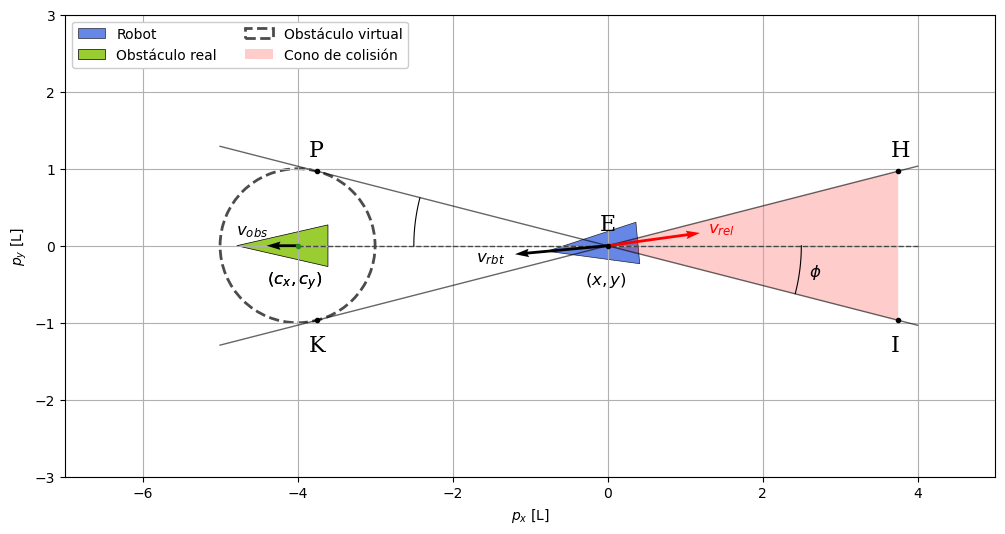

In [31]:
# ----------------------------
# C3BF - Gráficos de notación
# ----------------------------

# Parámetros
col_rad = 1

rbt_xy = np.array([ 0, 0])
obs_xy = np.array([-4, 0])
rbt_phi = -np.pi/1.03
obs_phi = np.pi
# ----------------------------------------------
# Inicialización y configuración de la figuras
fig = plt.figure(figsize = (12, 6), dpi = 100)
ax = fig.subplots()

ax.set_xlim([-7,5])
ax.set_ylim([-3,3])
ax.set_xlabel(r"$p_x$ [L]")
ax.set_ylabel(r"$p_y$ [L]")
ax.grid(True)

# Dibujamos el robot
icon_rbt = unicycle_patch(rbt_xy, rbt_phi, "royalblue")
icon_rbt.set_alpha(0.8)
icon_rbt.set_label("Robot")
ax.add_patch(icon_rbt)

# Dibujamos el obstáculo
icon_obs = unicycle_patch(obs_xy, obs_phi, "yellowgreen")
icon_col = patches.Circle(obs_xy, col_rad, alpha=0.7, fill=False,
                          color="k", ls="--", lw=2)
ax.add_patch(icon_obs)
ax.add_patch(icon_col)

# Dibujamos el cono
P, K = cone_params(obs_xy, col_rad, rbt_xy)
I, H = cone_params(-obs_xy, col_rad, rbt_xy)

cone = patches.Polygon(np.array([rbt_xy, H, I]), alpha=0.2,
                       color="red", zorder=1, lw=0)
ax.add_patch(cone)

# Dibujamos puntos
pts = np.array([[0,0],H,I,P,K])
ax.plot(pts[:,0], pts[:,1], ".k", zorder=3)
ax.plot(obs_xy[0], obs_xy[1], ".", c="forestgreen", zorder=4)

# Dibujamos rectas
x_draw  = np.linspace(-5,4,100)
x_draw2 = np.linspace(-4,0,100)

ax.plot(x_draw, (K[1]-H[1])/(K[0]-H[0])*x_draw, "-k", lw=1, alpha=0.6)
ax.plot(x_draw, (P[1]-I[1])/(P[0]-I[0])*x_draw, "-k", lw=1, alpha=0.6)
ax.plot( x_draw2, 0*x_draw2, "--k", lw=1, alpha=0.6)
ax.plot(-x_draw2, 0*x_draw2, "--k", lw=1, alpha=0.6)

# Dibujamos vectores
arr_kw = {"width":0.003, "scale":10, "zorder":2}

v_rel_x = (np.cos(obs_phi) - 3*np.cos(rbt_phi))/2
v_rel_y = (np.sin(obs_phi) - 3*np.sin(rbt_phi))/2
ax.quiver(rbt_xy[0], rbt_xy[1], v_rel_x, v_rel_y, color="red", **arr_kw)
ax.quiver(rbt_xy[0], rbt_xy[1], np.cos(rbt_phi), np.sin(rbt_phi), color="k", **arr_kw)
ax.quiver(obs_xy[0], obs_xy[1], np.cos(obs_phi)/3, np.sin(obs_phi)/3, color="k", **arr_kw)

# Dibujamos arcos
r = 2.5
x_arc1 = np.linspace(-r, -r*np.cos(np.pi/12.5), 100)
x_arc2 = np.linspace(r*np.cos(np.pi/12.5), r , 100)

ax.plot(x_arc1,  np.sqrt(r**2 - x_arc1**2), "-k", lw=0.8)
ax.plot(x_arc2, -np.sqrt(r**2 - x_arc2**2), "-k", lw=0.8)

# Dibujamos los textos
ax.text(2.6,-0.4, r"$\phi$",  fontsize=12)
ax.text(-0.29,-0.5, r"$(x,y)$", fontsize=12)
ax.text(-4.4,-0.5, r"$(c_x,c_y)$", fontsize=12)

ax.text(-0.1,0.2, "E", fontsize=16, fontfamily="serif")
ax.text(I[0]-0.1, I[1]-0.4, "I",  fontsize=16, fontfamily="serif")
ax.text(H[0]-0.1, H[1]+0.2, "H",  fontsize=16, fontfamily="serif")
ax.text(K[0]-0.1, K[1]-0.4, "K",  fontsize=16, fontfamily="serif")
ax.text(P[0]-0.1, P[1]+0.2, "P",  fontsize=16, fontfamily="serif")

ax.text(1.3, 0.17, r"$v_{rel}$", c="red", fontsize=12)
ax.text(-1.7, -0.2, r"$v_{rbt}$", fontsize=12)
ax.text(-4.8, 0.15, r"$v_{obs}$", fontsize=12)
ax.text(-4.4,-0.5, r"$(c_x,c_y)$", fontsize=12)

# Legenda
icon_obs.set_label("Obstáculo real")
icon_col.set_label("Obstáculo virtual")
cone.set_label("Cono de colisión")
plt.legend(loc="upper left", ncol=2, fancybox=True, framealpha=1)

# Guardamos y dibujamos la figura
plt.savefig(os.path.join(FOLDER_OUTPUT, 'C3BF_0.png'))
plt.show()

## PLOT: C3BF - Visualización del cono

In [32]:
# ----------------------------------------------------------------------
# Parámetros de la trayectoria
# ----------------------------------------------------------------------
XYoff = [0, 0]
a, b = 10, 7
alpha = 0

# Generamos la trayectoria
gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Parámetros del campo
s = 1
area = 30**2
XYoff_vfield = XYoff

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 40

# Constantes de los controladores
ke = 4
kn = 2

r = 1
gamma = 0.9

# Estado inicial de los agentes y número de agentes
n_agents = 2
p0 = np.array([[2, 8], [0, -7]])
v0 =  np.array([[0.9, 0]]).T
phi0 = np.pi - np.array([np.pi, 0])

x0 = [t0, p0, v0, phi0]

In [33]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulator(gvf_traj, n_agents, x0, dt, True)
sim.set_params(s, ke, kn, r, gamma)

# Generamos el campo (sin interacción de repulsión)
gvf_traj.vector_field(XYoff_vfield, area, s, ke)

# Realizamos toda la simulación mumerica
xdata, ydata = [], []
phidata = []
hdata = []
psi_data = []
kappa_data = []

for i in range(int(t_sim_final/dt)):
  if i != 0:
    xdata.append(sim.pf[:,0])
    ydata.append(sim.pf[:,1])
    phidata.append(sim.phif)

    hdata.append(sim.h)
    psi_data.append(sim.psi)
    kappa_data.append(sim.kappa)
  sim.int_euler()

# Pasamos todas las listas a numpy arrays para facilitar la indexación
xdata = np.array(xdata)
ydata = np.array(ydata)
phidata = np.array(phidata)

hdata = np.array(hdata)
psi_data = np.array(psi_data)
kappa_data = np.array(kappa_data)

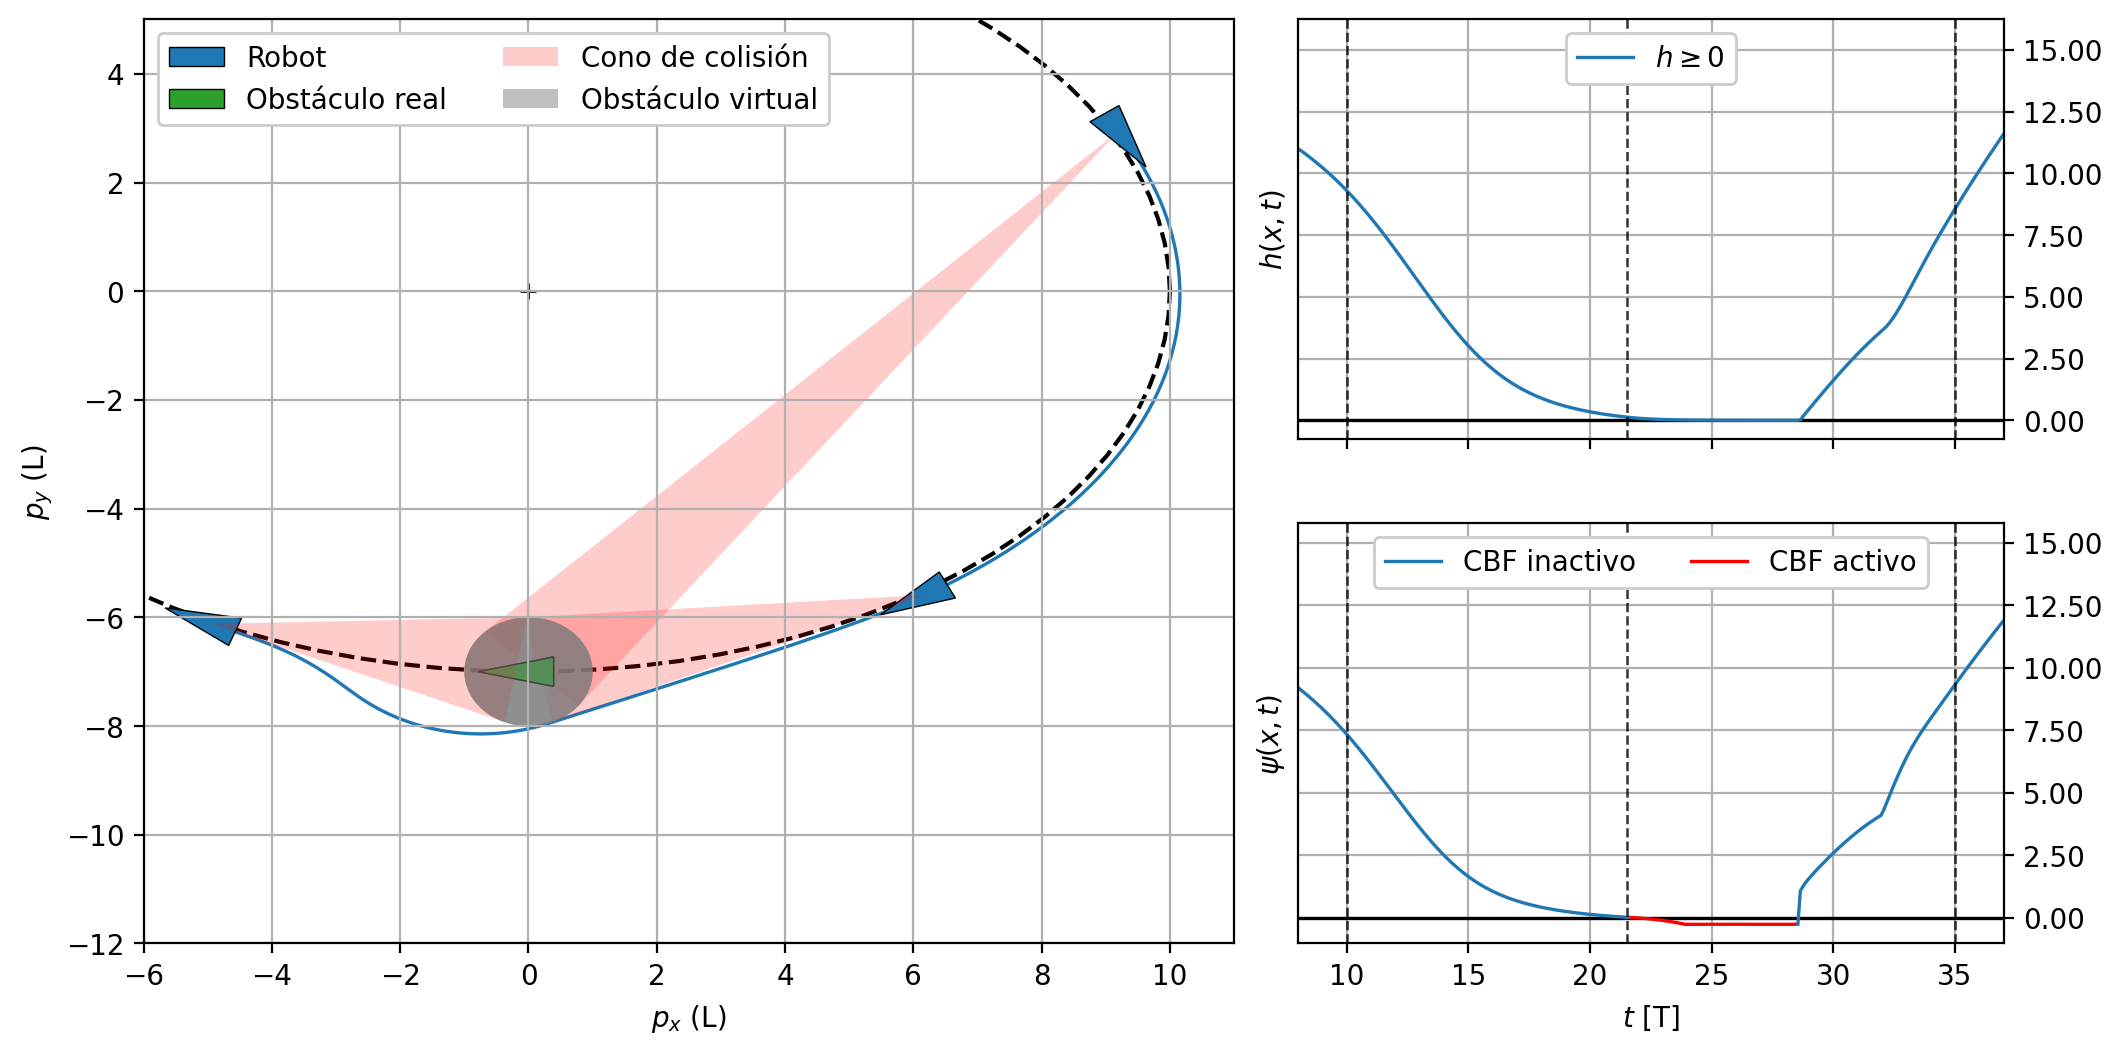

In [34]:
# Nos aseguramos de que la graficación interactiva está desactivada
%matplotlib inline

# -- Preliminares --
n_rbt = 0
n_obs = 1
color_rbt = color_palette()[0]
color_obs = color_palette()[2]
t_list = np.array([10,21.5,35])

# ----------------------------------------------------------------------
# Mostramos el estado final de la simulación (static plot)
# ----------------------------------------------------------------------

# Inicializamos las figuras y el grid
fig = plt.figure(figsize=(12, 6), dpi=200)
grid = plt.GridSpec(2, 5, hspace=0.2, wspace=0.2)
main_ax    = fig.add_subplot(grid[:,0:3])
hdata_ax   = fig.add_subplot(grid[0,3:5], xticklabels=[])
psidata_ax = fig.add_subplot(grid[1,3:5])

# Configuramos los ejes
main_ax.set_xlim([-6,11])
main_ax.set_ylim([-12,5])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True, zorder=0)

fmt_data_axis(hdata_ax, r"$h(x,t)$",
              xlim=[t_list[0]-2,t_list[-1]+2])
fmt_data_axis(psidata_ax, r"$\psi(x,t)$", r"$t$ [T]",
              xlim=[t_list[0]-2,t_list[-1]+2])

# Main axis ##
draw(gvf_traj, fig, main_ax, draw_field=False)

# -- Dibujamos los patches --
for t in t_list:
  li = int(t/dt)-1
  rbt_xy = [xdata[li,n_rbt], ydata[li,n_rbt]]
  obs_xy = [xdata[li,n_obs], ydata[li,n_obs]]

  # Dibujamos el robot
  icon_rbt = unicycle_patch([xdata[li,n_rbt], ydata[li,n_rbt]],
                            phidata[li,n_rbt], color_rbt)
  icon_obs = unicycle_patch([xdata[li,n_obs], ydata[li,n_obs]],
                            phidata[li,n_obs], color_obs)
  #icon_rbt.set_alpha(0.6)
  main_ax.add_patch(icon_rbt)
  main_ax.add_patch(icon_obs)

  # Dibujamos el cono
  p1, p2 = cone_params(obs_xy, r, rbt_xy)
  cone = patches.Polygon(np.array([rbt_xy, p1, p2]),
                        alpha=0.2, color="red", zorder=1, lw=0)
  icon_col = patches.Circle(obs_xy, r,
                  alpha=0.5, fill=True, color="gray", ls="-", lw=0)
  main_ax.add_patch(cone)
  main_ax.add_patch(icon_col)

    # Etiquetas
  if t == t_list[0]:
    icon_rbt.set_label("Robot")
    icon_obs.set_label("Obstáculo real")
    icon_col.set_label("Obstáculo virtual")
    cone.set_label("Cono de colisión")

# -- Dibujamos la traza --
li, lf = int(t_list[0]/dt)-1, int(t_list[-1]/dt)-1
main_ax.plot(xdata[li:lf,n_rbt],ydata[li:lf,n_rbt], c=color_rbt,
             ls="-", lw=1.2, zorder=0)

# Data axis ##
time_vec = np.linspace(0, t_sim_final, int(t_sim_final/dt)-1)

# Zero lines
hdata_ax.axhline(0, c="k", ls="-", lw=1.2, zorder=2)
psidata_ax.axhline(0, c="k", ls="-", lw=1.2, zorder=2)

# Plotting data
mask_active = psi_data[:,1,0] < 0

l1 = np.where(mask_active)[0][0]
l2 = np.where(mask_active)[0][-1]

psidata_ax.plot(time_vec[0:l1], psi_data[0:l1,1,0], c=color_rbt, lw=1.2,
                label="CBF inactivo")
psidata_ax.plot(time_vec[l1:l2], psi_data[l1:l2,1,0], c="red", lw=1.2,
                label="CBF activo")
psidata_ax.plot(time_vec[l2:], psi_data[l2:,1,0], c=color_rbt, lw=1.2)

hdata_ax.plot(time_vec, hdata[:,1,0], c=color_rbt, lw=1.2, label=r"$h \geq 0$")

# Vertical lines
for t in t_list:
  hdata_ax.axvline(t, c="k", ls="--", lw=0.9, zorder=2, alpha=0.8)
  psidata_ax.axvline(t, c="k", ls="--", lw=0.9, zorder=2, alpha=0.8)

# -- Visualizamos y guardamos --
main_ax.legend(loc="upper left", ncol=2, fancybox=True, framealpha=1)
hdata_ax.legend(loc="upper center", ncol=2, fancybox=True, framealpha=1)
psidata_ax.legend(loc="upper center", ncol=2, fancybox=True, framealpha=1)

plt.savefig(os.path.join(FOLDER_OUTPUT, 'C3BF_1.png'))
plt.show()

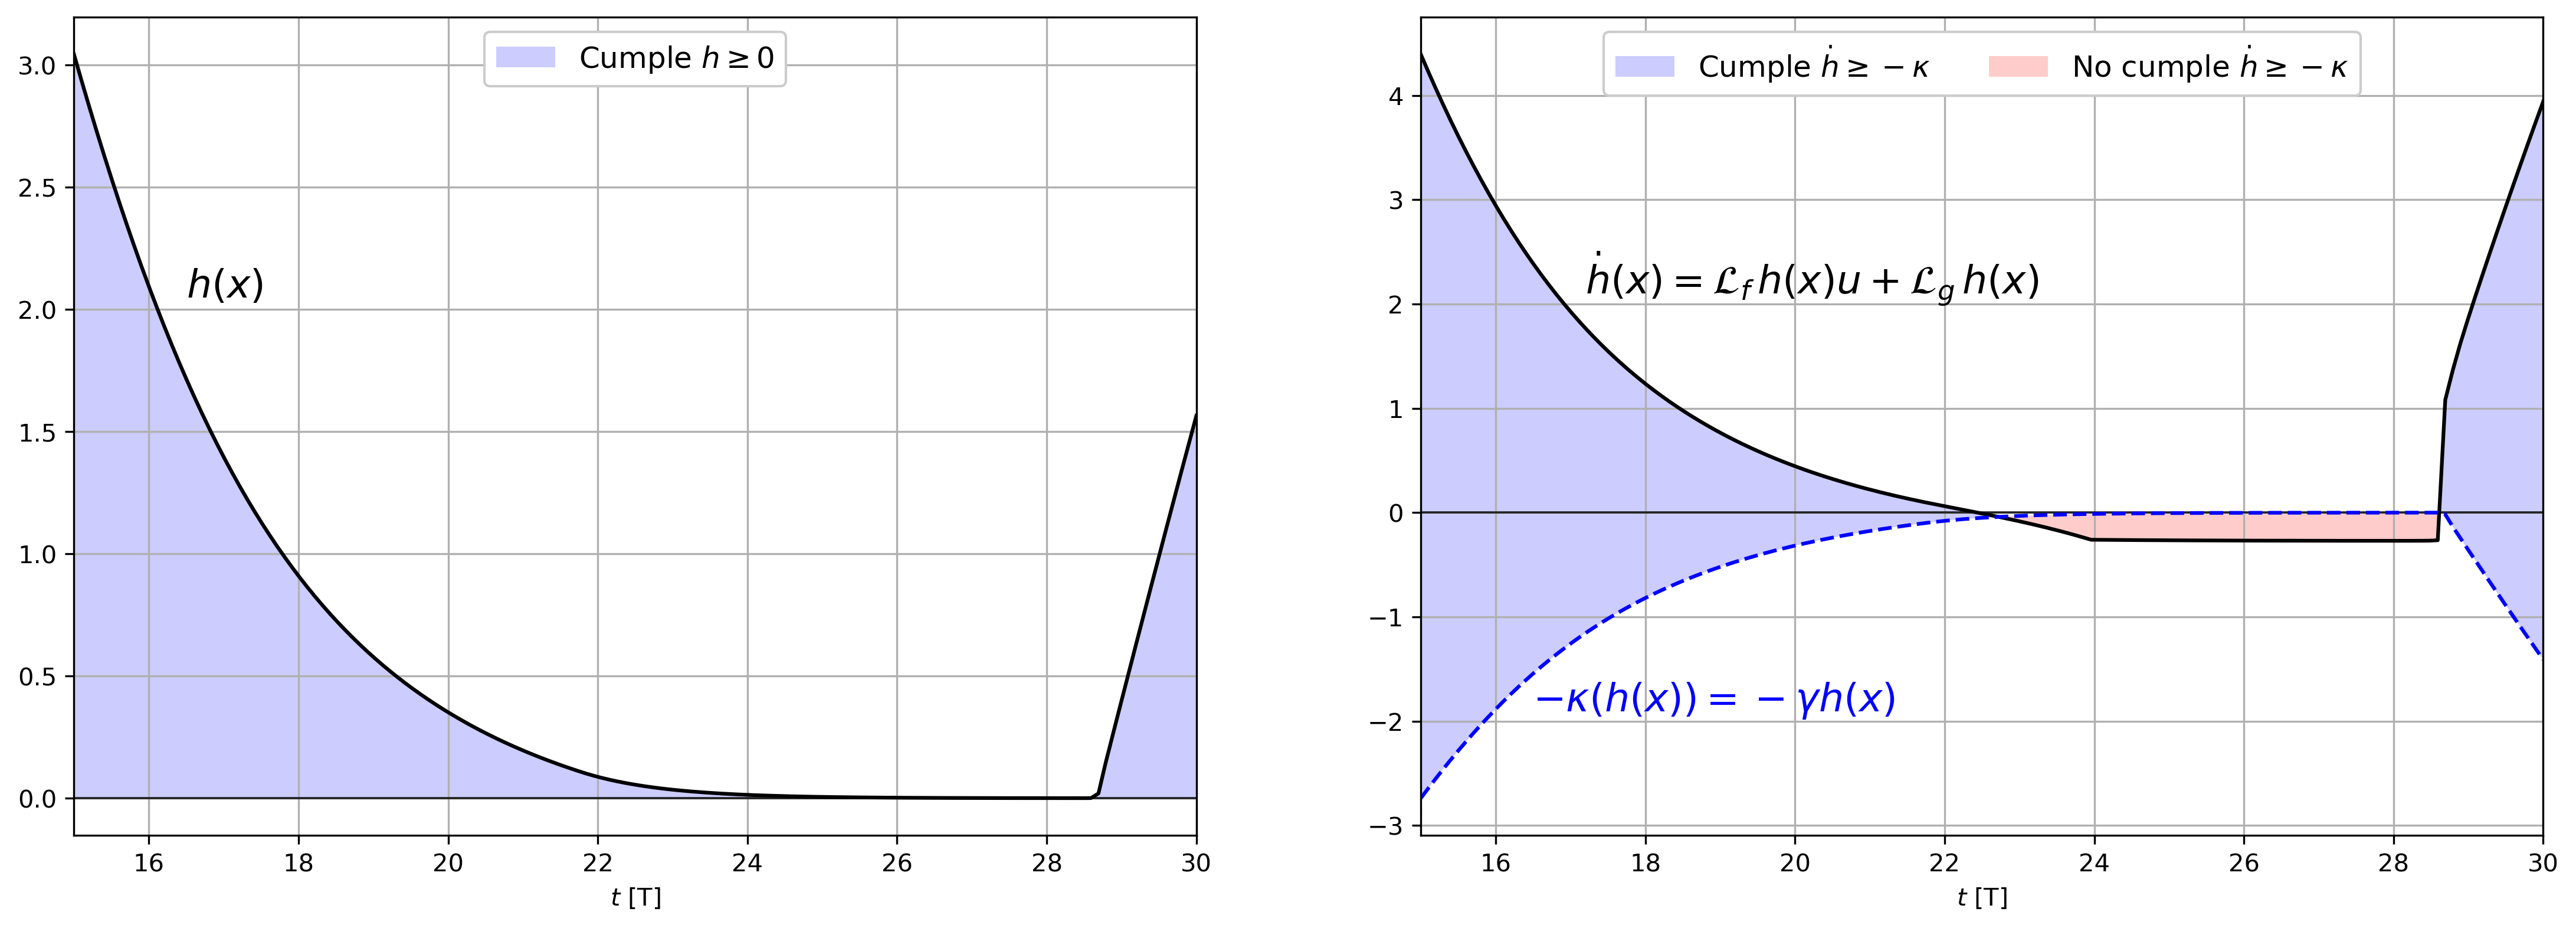

In [35]:
# -----------------------------
# CBF - Gráficos ilustrativos
# -----------------------------

# Preliminares
t1, t2 = 15, 30
li, lf = int(t1/dt-1), int(t2/dt-1)

# Rango de evaluación en x
x_eval = np.linspace(t1, t2, int((t2-t1)/dt))
h_eval = hdata[li:lf,1,0]
kappa_eval = -kappa_data[li:lf,1,0]
h_dot_eval  = psi_data[li:lf,1,0] - kappa_eval

# --------------------------------------------
# Inicialización y configuración de la figuras
fig = plt.figure(figsize = (18, 6), dpi = 300)
grid = plt.GridSpec(1, 2, hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(grid[:,0])
ax2 = fig.add_subplot(grid[:,1])

# Configuración de los ejes
ax1.set_xlim([t1,t2])
ax1.set_xlabel(r"$t$ [T]")
ax1.set_ylabel(r"")
ax1.grid(True)

ax2.set_xlim([t1,t2])
ax2.set_xlabel(r"$t$ [T]")
ax2.set_ylabel(r"")
ax2.grid(True)

# Graficamos
ax1.axhline(0, c="k", ls="-", lw=0.9, zorder=2, alpha=0.8)
ax1.plot(x_eval, h_eval, "k")

ax2.axhline(0, c="k", ls="-", lw=0.9, zorder=2, alpha=0.8)
ax2.plot(x_eval, h_dot_eval, "-k")
ax2.plot(x_eval, kappa_eval, "--b")

# Dibujamos el área
mask_active = h_dot_eval < kappa_eval

l1 = np.where(mask_active)[0][0]
l2 = np.where(mask_active)[0][-1]

area_pts0 = np.c_[np.array([x_eval, h_eval]),
                  np.array([np.flip(x_eval), 0*x_eval])].T
area_pts1 = np.c_[np.array([x_eval[:l1], h_dot_eval[:l1]]),
                  np.array([np.flip(x_eval[:l1]),
                            np.flip(kappa_eval[:l1])])].T
area_pts2 = np.c_[np.array([x_eval[l1:l2+1], h_dot_eval[l1:l2+1]]),
                  np.array([np.flip(x_eval[l1:l2+1]),
                            np.flip(kappa_eval[l1:l2+1])])].T
area_pts3 = np.c_[np.array([x_eval[l2:], h_dot_eval[l2:]]),
                  np.array([np.flip(x_eval[l2:]),
                            np.flip(kappa_eval[l2:])])].T

area0 = patches.Polygon(area_pts0, alpha=0.2, color="blue", zorder=1, lw=0,
                        label="Cumple $h \geq 0$")
area1 = patches.Polygon(area_pts1, alpha=0.2, color="blue", zorder=1, lw=0,
                        label="Cumple $\dot h \geq -\kappa$")
area2 = patches.Polygon(area_pts2, alpha=0.2, color="red", zorder=1, lw=0,
                        label="No cumple $\dot h \geq -\kappa$")
area3 = patches.Polygon(area_pts3, alpha=0.2, color="blue", zorder=1, lw=0)

ax1.add_patch(area0)
ax2.add_patch(area1)
ax2.add_patch(area2)
ax2.add_patch(area3)

# Texto
ax1.text(16.5, 2.05, r"$h(x)$", fontsize=16, c="k")

ax2.text(17.2, 2.1, r"$\dot h(x) = \mathcal{L}_f\,h(x)u + \mathcal{L}_g\,h(x)$",
         fontsize=16, c="k")
ax2.text(16.5, -1.9, r"$- \kappa(h(x)) = - \gamma h(x)$",
         fontsize=16, c="b")

# Guardamos la figura y visualizamos
ax1.legend(loc="upper center", ncol=1, fancybox=True, framealpha=1, fontsize=12)
ax2.legend(loc="upper center", ncol=2, fancybox=True, framealpha=1, fontsize=12)

plt.savefig(os.path.join(FOLDER_OUTPUT, 'CBF_1.png'))
plt.show()

## PLOT: Simulación GVF + CBF adaptada al experimento

In [44]:
# ----------------------------------------------------------------------
# Parámetros de la trayectoria
# ----------------------------------------------------------------------
XYoff = [0, 0]
a, b = 10, 7
alpha = 0

# Generamos la trayectoria
gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Parámetros del campo
s = 1
area = 30**2
XYoff_vfield = XYoff

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 20

# Constantes de los controladores
ke = 4
kn = 2

r = 1
gamma = 2

# Estado inicial de los agentes y número de agentes
n_agents = 3
p0 = np.array([[2, 2], [-2, 2], [3, -3]])
v0 =  np.array([[1.5,2.3,4]]).T
phi0 = np.pi - np.array([-3*np.pi/4, -np.pi/4, np.pi/4])

x0 = [t0, p0, v0, phi0]

In [45]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulator(gvf_traj, n_agents, x0, dt, True)
sim.set_params(s, ke, kn, r, gamma)

# Generamos el campo (sin interacción de repulsión)
gvf_traj.vector_field(XYoff_vfield, area, s, ke)

# Inicializamos
xdata, ydata = [], []
omega_safe_data = []
edata = []
phidata = []
psi_data = []

# Realizamos toda la simulación mumerica
for i in range(int(t_sim_final/dt)):
  if i != 0:
    xdata.append(sim.pf[:,0])
    ydata.append(sim.pf[:,1])
    phidata.append(sim.phif)
    edata.append(sim.e)

    psi_data.append(sim.psi)
    omega_safe_data.append(sim.omega_safe)

  sim.int_euler()

# Pasamos todas las listas a numpy arrays para facilitar la indexación
xdata = np.array(xdata)
ydata = np.array(ydata)
phidata = np.array(phidata)
edata = np.array(edata)

omega_safe_data = np.array(omega_safe_data)
psi_data = np.array(psi_data)

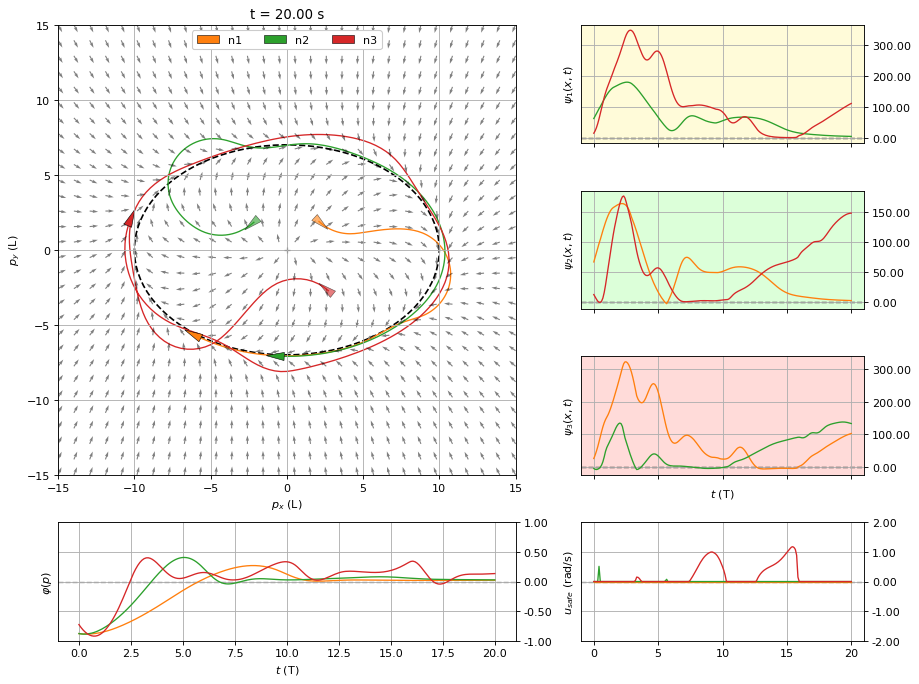

In [46]:
# Nos aseguramos de que la graficación interactiva está desactivada
%matplotlib inline

# ----------------------------------------------------------------------
# Mostramos el estado final de la simulación (static plot)
# ----------------------------------------------------------------------

figsize=(13, 10)
dpi=80

# Inicialización de las figuras y el grid
fig = plt.figure(figsize=figsize, dpi=dpi)
grid = plt.GridSpec(4, 5, hspace=0.4, wspace=0.6)

# Inicialización de los ejes
main_ax      = fig.add_subplot(grid[0:3, 0:3])
edata_ax     = fig.add_subplot(grid[3, 0:3])
wsafedata_ax = fig.add_subplot(grid[3, 3:5])


psi1_ax = fig.add_subplot(grid[0, 3:5], xticklabels=[])
psi2_ax = fig.add_subplot(grid[1, 3:5], xticklabels=[])
psi3_ax = fig.add_subplot(grid[2, 3:5], xticklabels=[])
psi_axis = [psi1_ax, psi2_ax, psi3_ax]

# Se da formato a los ejes
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

fmt_data_axis(wsafedata_ax, r"$u_{safe}$ (rad/s)", ylim=[-2,2])
fmt_data_axis(edata_ax, r"$\varphi(p)$", r"$t$ (T)", ylim=[-1,1])

fmt_data_axis(psi1_ax, r"$\psi_1(x,t)$")
fmt_data_axis(psi2_ax, r"$\psi_2(x,t)$")
fmt_data_axis(psi3_ax, r"$\psi_3(x,t)$", r"$t$ (T)")

# Background color
psi1_ax.patch.set_facecolor(cake_y)
psi2_ax.patch.set_facecolor(cake_g)
psi3_ax.patch.set_facecolor(cake_r)

## Main axis ----------------
draw(gvf_traj, fig, main_ax)
main_ax.set_title("t = {0:.2f} s".format(t_sim_final))

li = xdata.shape[0] - 1
for n in range(sim.N):
  color = color_palette()[n+1]
  icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], color)
  icon_init.set_alpha(0.6)
  icon = unicycle_patch([xdata[li,n], ydata[li,n]], phidata[li,n], color)
  icon.set_label("n"+str(n+1))

  main_ax.plot(xdata[:,n],ydata[:,n], c=color, ls="-", lw=1.2, zorder=0)
  main_ax.add_patch(icon_init)
  main_ax.add_patch(icon)

main_ax.legend(loc="upper center", ncol=sim.N, fancybox=True, framealpha=1)

## Data axis ----------------
time_vec = np.linspace(0, t_sim_final, int(t_sim_final/dt)-1)

# Zero lines
wsafedata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)
edata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

# Plotting data
for n in range(sim.N):
  color = color_palette()[n+1]
  wsafedata_ax.plot(time_vec, omega_safe_data[:,n], c=color, lw=1.2)
  edata_ax.plot(time_vec, edata[:,n], c=color, lw=1.2)
  for k in range(sim.N):
    if k != n:
      color = color_palette()[k+1]
      psi_axis[n].plot(time_vec, psi_data[:,k,n], c=color, lw=1.2)
      psi_axis[n].axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

plt.show()

In [39]:
# Activamos la graficación interactiva (necesario para animar en notebooks)
%matplotlib notebook
%matplotlib notebook

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# ----------------------------------------------------------------------
# Mostramos una animación de la simulación numérica
# ----------------------------------------------------------------------

n_tail  = 250
figsize = (13, 10)
dpi     = 100

# Inicialización de las figuras y el grid
fig = plt.figure(figsize=figsize, dpi=dpi)
grid = plt.GridSpec(4, 5, hspace=0.4, wspace=0.6)

# Inicialización de los ejes
main_ax      = fig.add_subplot(grid[0:3, 0:3])
edata_ax     = fig.add_subplot(grid[3, 0:3])
wsafedata_ax = fig.add_subplot(grid[3, 3:5])

psi1_ax = fig.add_subplot(grid[0, 3:5], xticklabels=[])
psi2_ax = fig.add_subplot(grid[1, 3:5], xticklabels=[])
psi3_ax = fig.add_subplot(grid[2, 3:5], xticklabels=[])
psi_axis = [psi1_ax, psi2_ax, psi3_ax]

# Se da formato a los ejes
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

fmt_data_axis(wsafedata_ax, r"$u_{safe}$ (rad/s)", ylim=[-2,2])
fmt_data_axis(edata_ax, r"$\varphi(p)$", r"$t$ (T)", ylim=[-1,1])

fmt_data_axis(psi1_ax, r"$\psi_1(x,t)$")
fmt_data_axis(psi2_ax, r"$\psi_2(x,t)$")
fmt_data_axis(psi3_ax, r"$\psi_3(x,t)$", r"$t$ (T)")

# Background color
psi1_ax.patch.set_facecolor(cake_b)
psi2_ax.patch.set_facecolor(cake_y)
psi3_ax.patch.set_facecolor(cake_g)

# -------------
# Main ax init
# -------------
draw(gvf_traj, fig, main_ax)

lines_plt = []
icons_plt = []
c_palet = color_palette()
for n in range(sim.N):
  icon = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], c_palet[n])
  icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], c_palet[n])
  icon_init.set_alpha(0.6)
  icon_init.set_label("n"+str(n+1))


  main_ax.add_patch(icon_init)
  main_ax.add_patch(icon)
  line, = main_ax.plot(xdata[:,n], ydata[:,n], c=c_palet[n],
                       ls="-", lw=0.8)

  lines_plt.append(line)
  icons_plt.append(icon)

main_ax.legend(loc="upper center", ncol=sim.N, fancybox=True, framealpha=1)
txt_title = main_ax.set_title("")

# -------------
# Data axs init
# -------------
time_vec = np.linspace(0, t_sim_final, int(t_sim_final/dt)-1)

# Zero lines
wsafedata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)
edata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

data_lines_plt = []
psilines = []
for n in range(sim.N):
  kw = dict(c=c_palet[n], lw=1.2)
  wsafedata_ax.plot(time_vec, omega_safe_data[:,n], **kw)
  edata_ax.plot(time_vec, edata[:,n], **kw)
  for k in range(sim.N):
    if k != n:
      color = c_palet[k]
      psi_axis[n].plot(time_vec, psi_data[:,k,n], c=color, lw=1.2)
      psi_axis[n].axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)
  psilines.append(psi_axis[n].axvline(0, c="black", ls="--", lw=1.2))

wline = wsafedata_ax.axvline(0, c="black", ls="--", lw=1.2)
eline = edata_ax.axvline(0, c="black", ls="--", lw=1.2)

# Plotting data
for n in range(sim.N):
  color = c_palet[n]
  wsafedata_ax.plot(time_vec, omega_safe_data[:,n], c=color, lw=1.2)
  edata_ax.plot(time_vec, edata[:,n], c=color, lw=1.2)
  for k in range(sim.N):
    if k != n:
      color = c_palet[k]
      psi_axis[n].plot(time_vec, psi_data[:,k,n], c=color, lw=1.2)
      psi_axis[n].axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

# ---------
# Animación
# ---------
# Función para actualizar la animación
def animate(i):
  for n in range(sim.N):
    icons_plt[n].remove()
    icons_plt[n] = unicycle_patch([xdata[i,n], ydata[i,n]], phidata[i,n], c_palet[n])
    icons_plt[n].set_zorder(3)

    main_ax.add_patch(icons_plt[n])
    psilines[n].set_xdata(i*dt)

    # Dibujamos la cola
    if i > n_tail:
      lines_plt[n].set_data(xdata[i-n_tail:i,n], ydata[i-n_tail:i,n])
    else:
      lines_plt[n].set_data(xdata[0:i,n], ydata[0:i,n])

  # Actualizamos el título
  txt_title.set_text('Frame = {0:>4} | Tf = {1:>5.2f} s'.format(i, i*dt))

  wline.set_xdata(i*dt)
  eline.set_xdata(i*dt)

  # Mostramos el porcentaje de carga de la simulación
  if (i % int((xdata.shape[0]-1)/10) == 0):
    print("tf = {0:>5.2f} | {1:.2%}".format(i*dt, i/(xdata.shape[0]-1)))

# Generamos la animación y la visualizamos
anim = FuncAnimation(fig, animate, frames=xdata.shape[0], interval=20)

# Visualizamos la animación
HTML(anim.to_html5_video()) # Esto tarda...

<IPython.core.display.Javascript object>

tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  1.90 | 9.60%
tf =  3.80 | 19.19%
tf =  5.70 | 28.79%
tf =  7.60 | 38.38%
tf =  9.50 | 47.98%
tf = 11.40 | 57.58%
tf = 13.30 | 67.17%
tf = 15.20 | 76.77%
tf = 17.10 | 86.36%
tf = 19.00 | 95.96%


## ANIMACIÓN: Simulación GVF + CBF

In [6]:
# ----------------------------------------------------------------------
# Parámetros de la trayectoria
# ----------------------------------------------------------------------
XYoff = [0, 0]
a, b = 10, 7
alpha = 0

# Generamos la trayectoria
gvf_traj = gvf_ellipse(XYoff,alpha,a,b)

# Parámetros del campo
s = 1
area = 30**2
XYoff_vfield = XYoff

# ----------------------------------------------------------------------
# Parámetros de la simulación
# ----------------------------------------------------------------------
dt = 0.1
t0 = 0
t_sim_final = 50

# Constantes de los controladores
ke = 4
kn = 2

r = 1
gamma = 2

# Estado inicial de los agentes y número de agentes
n_agents = 4
p0 = np.array([[2, 2], [-2, 2], [3, -3], [2, -2]])
v0 =  np.array([[1.5,2.3,1,1]]).T
phi0 = np.pi - np.array([-3*np.pi/4, -np.pi/4, np.pi/4, 3*np.pi/4])

x0 = [t0, p0, v0, phi0]

In [7]:
# ----------------------------------------------------------------------
# Simulación numérica
# ----------------------------------------------------------------------

# Inicializamos la simulación
sim = simulator(gvf_traj, n_agents, x0, dt, True)
sim.set_params(s, ke, kn, r, gamma)

# Generamos el campo (sin interacción de repulsión)
gvf_traj.vector_field(XYoff_vfield, area, s, ke)

# Inicializamos
xdata, ydata = [], []
phidata = []

omega_safe_data = []
edata = []

# Realizamos toda la simulación mumerica
for i in range(int(t_sim_final/dt)):
  if i != 0:
    xdata.append(sim.pf[:,0])
    ydata.append(sim.pf[:,1])
    phidata.append(sim.phif)

    omega_safe_data.append(sim.omega_safe)
    edata.append(sim.e)

  sim.int_euler()

# Pasamos todas las listas a numpy arrays para facilitar la indexación
xdata = np.array(xdata)
ydata = np.array(ydata)
phidata = np.array(phidata)

omega_safe_data = np.array(omega_safe_data)
edata = np.array(edata)

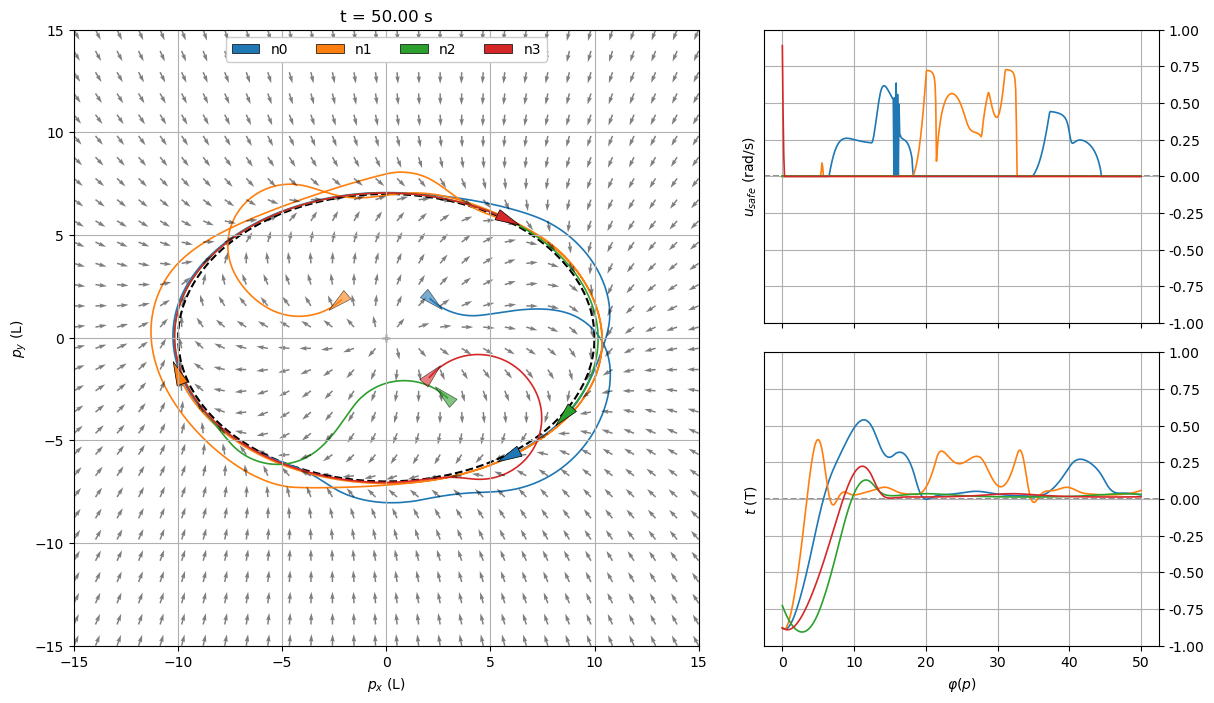

In [8]:
# Nos aseguramos de que la graficación interactiva está desactivada
%matplotlib inline

# ----------------------------------------------------------------------
# Mostramos el estado final de la simulación (static plot)
# ----------------------------------------------------------------------

figsize=(14, 8)
dpi=100

# Inicialización de las figuras y el grid
fig = plt.figure(figsize=figsize, dpi=dpi)
grid = plt.GridSpec(2, 5, hspace=0.1, wspace=0.4)

# Inicialización de los ejes
main_ax      = fig.add_subplot(grid[:, 0:3])
wsafedata_ax = fig.add_subplot(grid[0, 3:5], xticklabels=[])
edata_ax     = fig.add_subplot(grid[1, 3:5])

# Se da formato a los ejes
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

fmt_data_axis(wsafedata_ax, ylabel = r"$u_{safe}$ (rad/s)", ylim=[-1,1])
fmt_data_axis(edata_ax, r"$t$ (T)", r"$\varphi(p)$", ylim=[-1,1])

# Main axis ----------------
draw(gvf_traj, fig, main_ax)
main_ax.set_title("t = {0:.2f} s".format(t_sim_final))

li = xdata.shape[0] - 1
for n in range(sim.N):
  color = color_palette()[n]
  icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], color)
  icon_init.set_alpha(0.6)
  icon = unicycle_patch([xdata[li,n], ydata[li,n]], phidata[li,n], color)
  icon.set_label("n"+str(n))

  main_ax.plot(xdata[:,n],ydata[:,n], c=color, ls="-", lw=1.2, zorder=0)
  main_ax.add_patch(icon_init)
  main_ax.add_patch(icon)

main_ax.legend(loc="upper center", ncol=sim.N, fancybox=True, framealpha=1)

# Data axis ----------------
time_vec = np.linspace(0, t_sim_final, int(t_sim_final/dt)-1)

# Zero lines
wsafedata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)
edata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

# Plotting data
for n in range(sim.N):
  wsafedata_ax.plot(time_vec, omega_safe_data[:,n], c=color_palette()[n], lw=1.2)
  edata_ax.plot(time_vec, edata[:,n], c=color_palette()[n], lw=1.2)

plt.show()

In [9]:
# Activamos la graficación interactiva (necesario para animar en notebooks)
%matplotlib notebook
%matplotlib notebook

import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# ----------------------------------------------------------------------
# Mostramos una animación de la simulación numérica
# ----------------------------------------------------------------------

n_tail = 250
figsize=(14, 8)
dpi=80

# Inicialización de las figuras y el grid
fig = plt.figure(figsize=figsize, dpi=dpi)
grid = plt.GridSpec(2, 5, hspace=0.1, wspace=0.4)

# Inicialización de los ejes
main_ax      = fig.add_subplot(grid[:, 0:3])
wsafedata_ax = fig.add_subplot(grid[0, 3:5], xticklabels=[])
edata_ax     = fig.add_subplot(grid[1, 3:5])

# Se da formato a los ejes
main_ax.set_xlim([-15,15])
main_ax.set_ylim([-15,15])
main_ax.set_ylabel(r"$p_y$ (L)")
main_ax.set_xlabel(r"$p_x$ (L)")
main_ax.grid(True)

fmt_data_axis(wsafedata_ax, ylabel = r"$u_{safe}$ (rad/s)", ylim=[-1,1])
fmt_data_axis(edata_ax, r"$t$ (T)", r"$\varphi(p)$", ylim=[-1,1])

# -------------
# Main ax init
# -------------
draw(gvf_traj, fig, main_ax)

lines_plt = []
icons_plt = []
c_palet = color_palette()
for n in range(sim.N):
  icon = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], c_palet[n])
  icon_init = unicycle_patch([xdata[0,n], ydata[0,n]], phidata[0,n], c_palet[n])
  icon_init.set_alpha(0.6)
  icon_init.set_label("n"+str(n))


  main_ax.add_patch(icon_init)
  main_ax.add_patch(icon)
  line, = main_ax.plot(xdata[:,n], ydata[:,n], c=c_palet[n],
                       ls="-", lw=0.8)

  lines_plt.append(line)
  icons_plt.append(icon)

main_ax.legend(loc="upper center", ncol=sim.N, fancybox=True, framealpha=1)
txt_title = main_ax.set_title("")

# -------------
# Data axs init
# -------------
time_vec = np.linspace(0, t_sim_final, int(t_sim_final/dt)-1)

# Zero lines
wsafedata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)
edata_ax.axhline(0, c="k", ls="--", lw=1.2, zorder=0, alpha=0.5)

data_lines_plt = []
for n in range(sim.N):
  kw = dict(c=c_palet[n], lw=1.2)
  wsafedata_ax.plot(time_vec, omega_safe_data[:,n], **kw)
  edata_ax.plot(time_vec, edata[:,n], **kw)

wline = wsafedata_ax.axvline(0, c="black", ls="--", lw=1.2)
eline = edata_ax.axvline(0, c="black", ls="--", lw=1.2)

# ---------
# Animación
# ---------
# Función para actualizar la animación
def animate(i):
  for n in range(sim.N):
    icons_plt[n].remove()
    icons_plt[n] = unicycle_patch([xdata[i,n], ydata[i,n]], phidata[i,n], c_palet[n])
    icons_plt[n].set_zorder(3)

    main_ax.add_patch(icons_plt[n])

    # Dibujamos la cola
    if i > n_tail:
      lines_plt[n].set_data(xdata[i-n_tail:i,n], ydata[i-n_tail:i,n])
    else:
      lines_plt[n].set_data(xdata[0:i,n], ydata[0:i,n])

  # Actualizamos el título
  txt_title.set_text('Frame = {0:>4} | Tf = {1:>5.2f} s'.format(i, i*dt))

  wline.set_xdata(i*dt)
  eline.set_xdata(i*dt)

  # Mostramos el porcentaje de carga de la simulación
  if (i % int((xdata.shape[0]-1)/10) == 0):
    print("tf = {0:>5.2f} | {1:.2%}".format(i*dt, i/(xdata.shape[0]-1)))

# Generamos la animación y la visualizamos
anim = FuncAnimation(fig, animate, frames=xdata.shape[0], interval=20)

# Visualizamos la animación
HTML(anim.to_html5_video()) # Esto tarda...

<IPython.core.display.Javascript object>

tf =  0.00 | 0.00%
tf =  0.00 | 0.00%
tf =  4.90 | 9.84%


KeyboardInterrupt: 